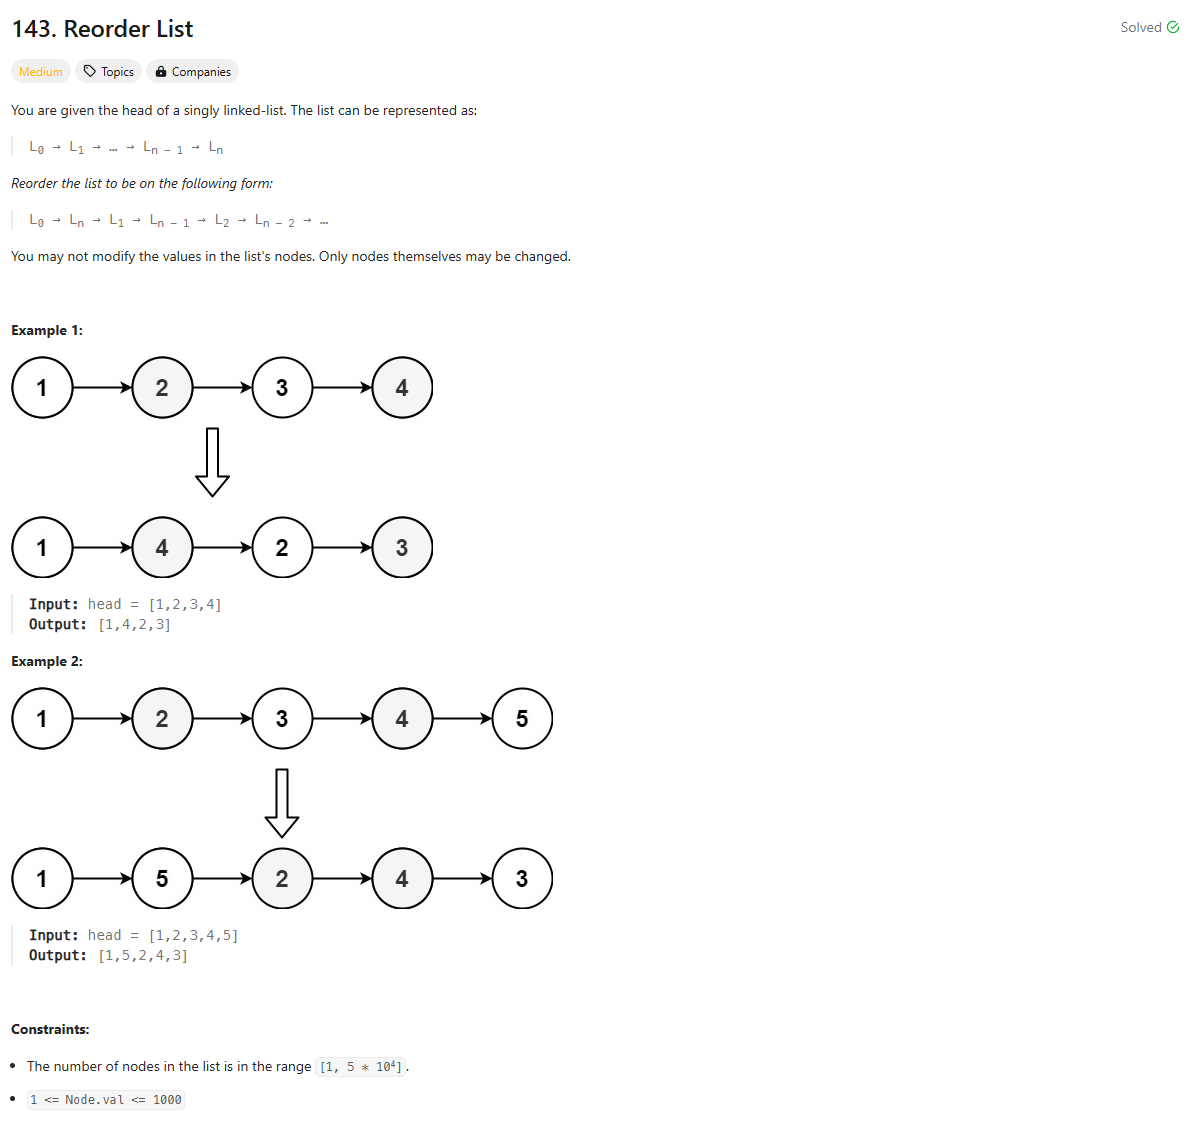

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next

In [ ]:
# Solution 1 (Reverse the second half and join with the first)
# Time: O(n)
# Memory: O(1)

class Solution:
    def reorderList(self, head: Optional[ListNode]) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        # For cases with 0, 1, 2 nodes, result is the same as input (head)
        if (head is None) or (head.next is None)  or (head.next.next is None):
            return head

        # Find the mid point
        fastHead = midNode = head
        while fastHead.next and fastHead.next.next:
            midNode = midNode.next
            fastHead = fastHead.next.next
        
        # Close the first-half end
        tempNode = midNode.next
        midNode.next = None

        # Reverse the second-half
        behind = None
        curr = tempNode
        while curr is not None:
            ahead = curr.next
            curr.next = behind
            behind = curr
            curr = ahead
        head2 = behind

        # Merge the two half
        result = head
        while head2:
            temp = head.next
            temp2 = head2.next

            head.next = head2
            head2.next = temp
            head, head2 = temp, temp2
        return head

In [ ]:
# Solution 2 (Put the porblem into array format then reorder it)
# Time: O(n)
# Memory: O(n)

class Solution:
    def reorderList(self, head: Optional[ListNode]) -> None:
        nodes = []
        while head:
            nodes.append(head)
            head = head.next
        
        i = 0
        j = len(nodes) - 1
        while i < j:
            nodes[i].next = nodes[j]
            i += 1
            if j > i:
                nodes[j].next = nodes[i]
                j -= 1
        nodes[i].next = None
        
        return nodes[0]

In [ ]:
#  Soulation 3 (Recursive)
#  Time: O(n)
#  Memory: O(n)

class Solution:
    def reorderList(self, head: Optional[ListNode]) -> None:
        def recursive(head, curr):
            if curr is None:
                return head
            head = recursive(head, curr.next)
            if head:
                if head == curr or head.next == curr:
                    curr.next = None
                    return None
                else:
                    temp = head.next
                    head.next = curr
                    curr.next = temp
                    return temp
        recursive(head, head.next)
        return head